----------------

# Purchasing power parity : Online Retail Store

![](https://imgs.search.brave.com/uJFiqgz0-xuNmkuFKK5rB4oFgFTtd-WlzBc8mIjghJ4/rs:fit:1200:980:1/g:ce/aHR0cHM6Ly93d3cu/bWlzdGF5LmluL3Ry/YXZlbC1ibG9nL2Nv/bnRlbnQvaW1hZ2Vz/LzIwMjAvMDcvb25s/aW5lLXNob3BwaW5n/LmpwZw)

--------------------

**Table of Contents:**                       
>1. [Problem Statement](#1)                    
>2. [Project Objective](#2)         
>3. [Data Description](#3)                              
>4. [Data Pre-processing Steps and Inspiration](#4)               
>5. [Choosing the Algorithm for the Project](#5)                     
>6. [Motivation and Reasons For Choosing the Algorithm](#6)                     
>7. [Assumptions](#7)                          
>8. [Model Evaluation and Techniques](#8)                         
>9. [Inferences from the Same](#9)                        
>10. [Future Possibilities of the Project](#10)                             
>11. [Conclusion](#11)                     
>12. [References](#12)         

---------------

<a id='1'></a>
**Problem Statement :**           
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

-------

<a id='2'></a>
**Project Objective :**                  
The objective of this project is to analyze the customer purchase patterns of an online retail store using the online_retail.csv dataset.                              
The analysis should provide insights into customer behavior and generate actionable insights for the store.

-------------------

<a id='3'></a>
**Data Description :**          
The online_retail.csv contains 387961 rows and 8 columns.

|Feature Name |Description                  |
|-------------|-----------------------------|
|Invoice      |Invoice number               |
|StockCode    |Product ID                   |
|Description  |Product Description          |
|Quantity     |Quantity of the product      |
|InvoiceDate  |Date of the invoice          |
|Price        |Price of the product per unit|
|CustomerID   |Customer ID                  |
|Country      |Region of Purchase           |

-----------------------

<a id='4'></a>
**Data Pre-processing Steps and Inspiration :**                  
The online_retail.csv dataset contains several missing values and outliers.                                
Therefore, it is important to perform data pre-processing steps prior to any analysis.                                                                      
This includes data cleaning and data wrangling techniques such as formatting, imputing missing values, removing outliers, and handling missing values.                    
Moreover, it is important to inspire the data to uncover useful information.    

----------------

------------------

<a id='5'></a>
**Choosing the Algorithm for the Project :**           
For this project, unsupervised learning algorithms such as clustering and association rule mining can be used to analyze the customer purchase patterns.                                 
Clustering algorithms, such as K-Means, can be used to group customers based on their purchase patterns.                                                                                   
Association rule mining algorithms, such as Apriori, can be used to uncover interesting relationships among items purchased.

-----------------

<a id='6'></a>
**Motivation and Reasons For Choosing the Algorithm :**                  
The choice of algorithms is motivated by the need to uncover hidden patterns in the data that can provide insights into customer purchase behavior.           
Clustering algorithms can be used to group customers based on their purchase patterns, while association rule mining algorithms can be used to uncover interesting relationships among items purchased.

------------------

<a id='7'></a>
**Assumptions :**                        
> - It is assumed that the data is clean and free from any errors or inconsistencies.        
> - Furthermore, it is assumed that all features are relevant and that the features are sufficient to provide insights into customer purchase patterns.

-------------

<a id='8'></a>
**Model Evaluation and Techniques :**                   
The clustering algorithms and association rule mining algorithms can be evaluated using different metrics such as accuracy, precision, recall, f1-score, and log-loss.           
Furthermore, model selection techniques such as cross-validation and grid search can be used to optimize the parameters of the models.

-------------

<a id='9'></a>
**Inferences from the Same :**                       
The analysis of customer purchase patterns can provide useful insights into customer behavior.                     
For example, clustering algorithms can be used to group customers based on their purchase patterns.                  
Association rule mining algorithms can be used to uncover interesting relationships among items purchased.                        
These insights can then be used to inform marketing and product decisions.

------------------

<a id='10'></a>
**Future Possibilities of the Project :**                       
The analysis of customer purchase patterns can be further extended by incorporating other datasets such as demographic data and customer feedback data.                 
Furthermore,            
                                                                                                                                                        predictive analytics techniques such as regression and classification can be used to predict customer behavior based on past purchase patterns.            


------------

<a id='11'></a>
**Conclusions :**                                     
Our project provided evidence-based insights into customer purchase behavior that will help the online retailer make better business decisions.                                                                                                                         
We identified the factors that affect customer purchase behavior and segmented the customers based on their behavior.                      
We hope that our analysis will be useful for the online retailer in improving their business.

---------------------

<a id='12'></a>
**References :**                   


Kaggle: [kaggle.com](https://www.kaggle.com/datasets/vijayuv/onlineretail)









----------------------

# 1. Basic Imports

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings("ignore")

# 2. Loading Dataset

In [46]:
df=pd.read_csv('OnlineRetail.csv', encoding= 'cp1252' , header=0)
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [47]:
df.shape

(541909, 8)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [49]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [51]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [52]:
# Droping rows having missing values
df = df.dropna()
df.shape

(406829, 8)

In [53]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)

# 3. Basic Analysis

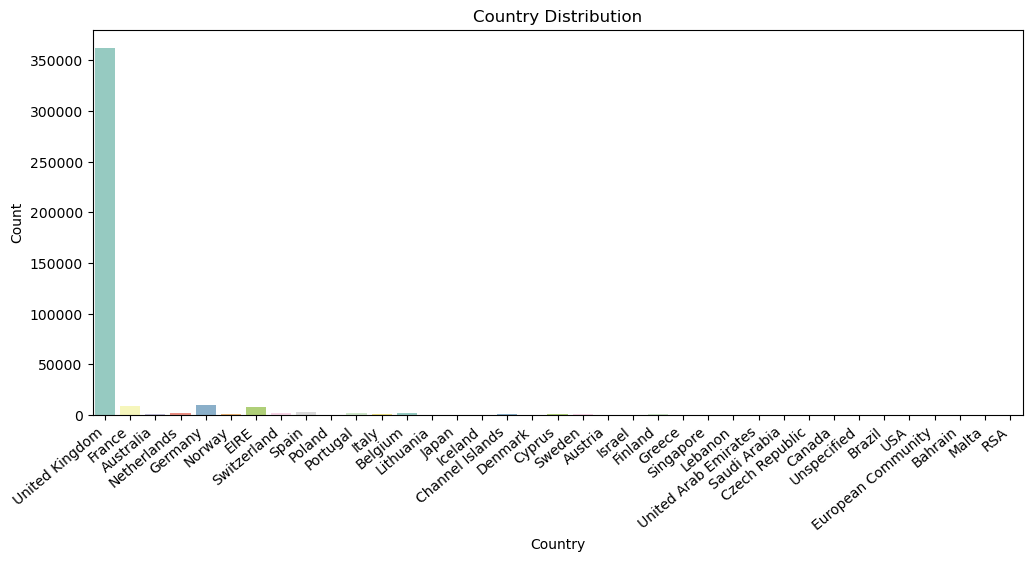

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(df['Country'],palette= 'Set3')
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Count');

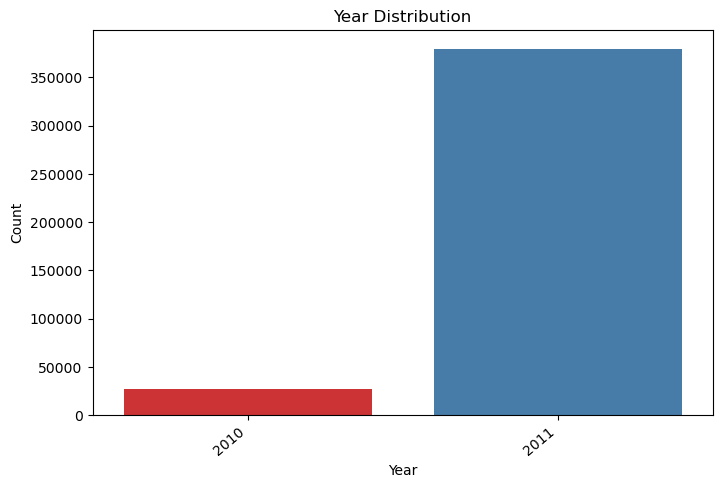

In [55]:
plt.figure(figsize=(8,5))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
sns.countplot(df['InvoiceDate'].dt.year,palette= 'Set1')
plt.xticks(rotation=40,ha='right')
plt.title("Year Distribution")
plt.xlabel('Year')
plt.ylabel('Count');

Text(0.5, 0, 'Month')

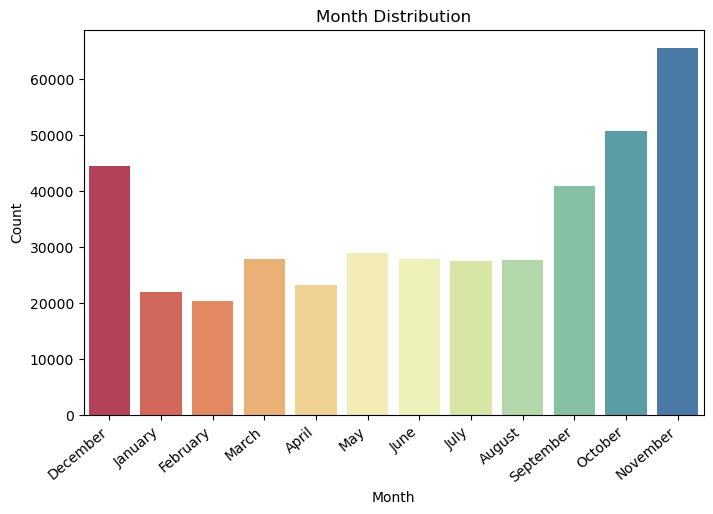

In [12]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=40,ha='right')
sns.countplot(df['InvoiceDate'].dt.month_name(),palette= 'Spectral')
plt.title("Month Distribution")
plt.ylabel('Count')
plt.xlabel('Month')

 highest amount of sales in November

Text(0, 0.5, 'Count')

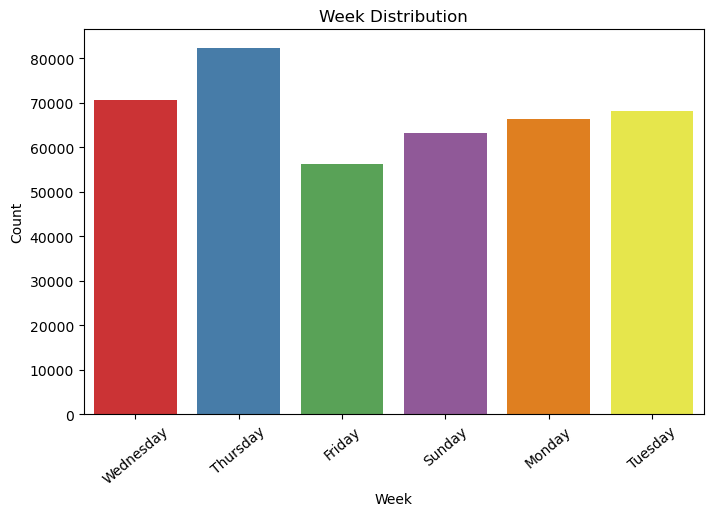

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(df['InvoiceDate'].dt.day_name(),palette= 'Set1')
plt.xticks(rotation=40)
plt.title("Week Distribution")
plt.xlabel('Week')
plt.ylabel('Count')

# 4. Attributes (Amount, Frequency and Recency)

In [57]:
# New Attribute : Amount:

df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [58]:
# New Attribute : Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [59]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()


,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [60]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [61]:
# Compute the maximum date to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [62]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [63]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()


,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [64]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [65]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# 5. Dealing with Outliers

Text(0.5, 0, 'Attributes')

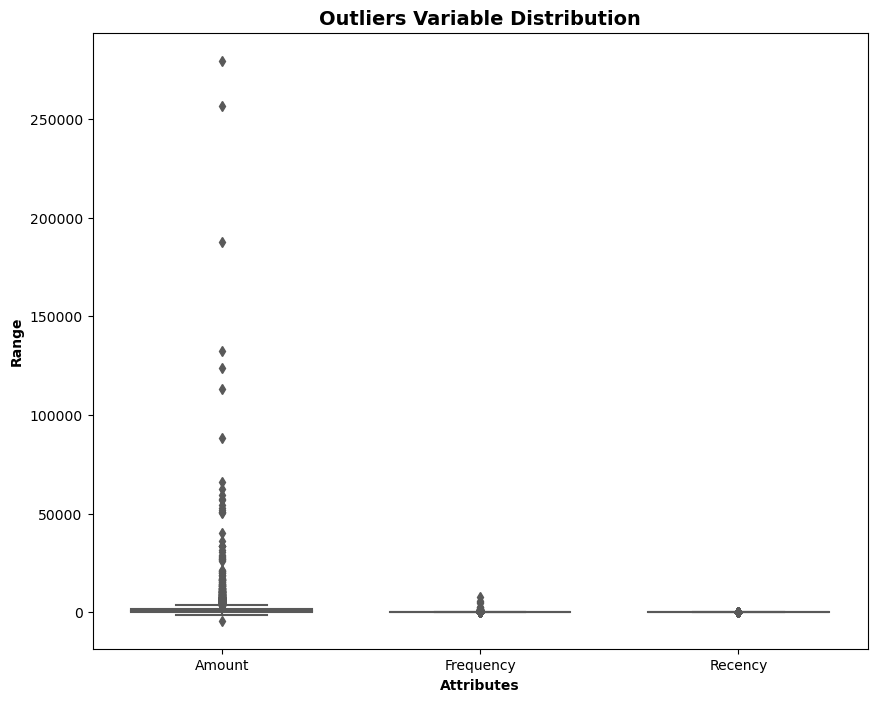

In [66]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


In [67]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [68]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [69]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 6. K-Means

In [70]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [71]:
kmeans.labels_

array([0, 3, 2, ..., 0, 2, 2])

Text(0, 0.5, 'Intertia')

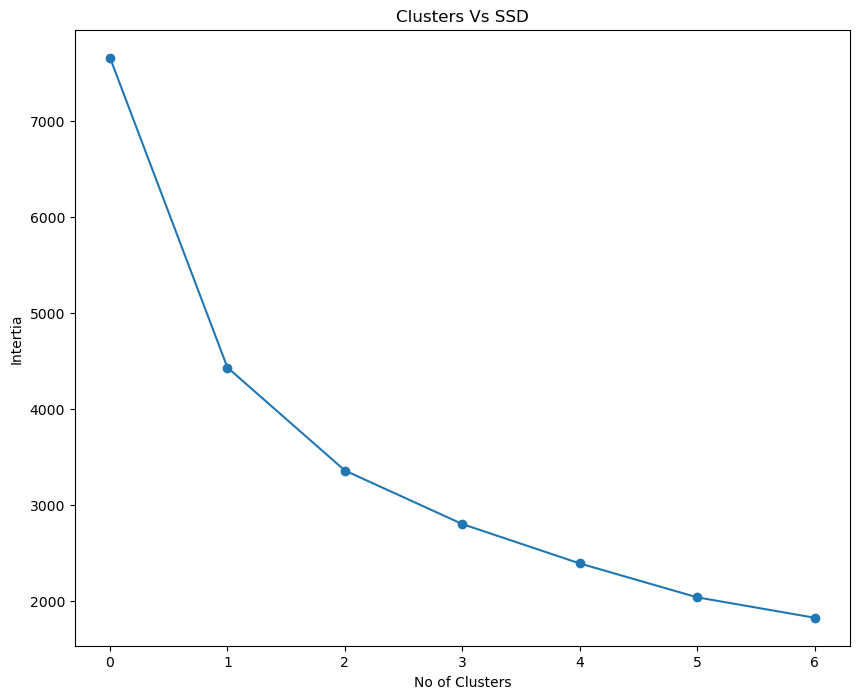

In [72]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')


In [30]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.46549133435429624
For n_clusters=6, the silhouette score is 0.41742250872395564
For n_clusters=7, the silhouette score is 0.4154011163465708
For n_clusters=8, the silhouette score is 0.394692642046272


In [31]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(max_iter=50, n_clusters=3)

In [32]:
 kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [33]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

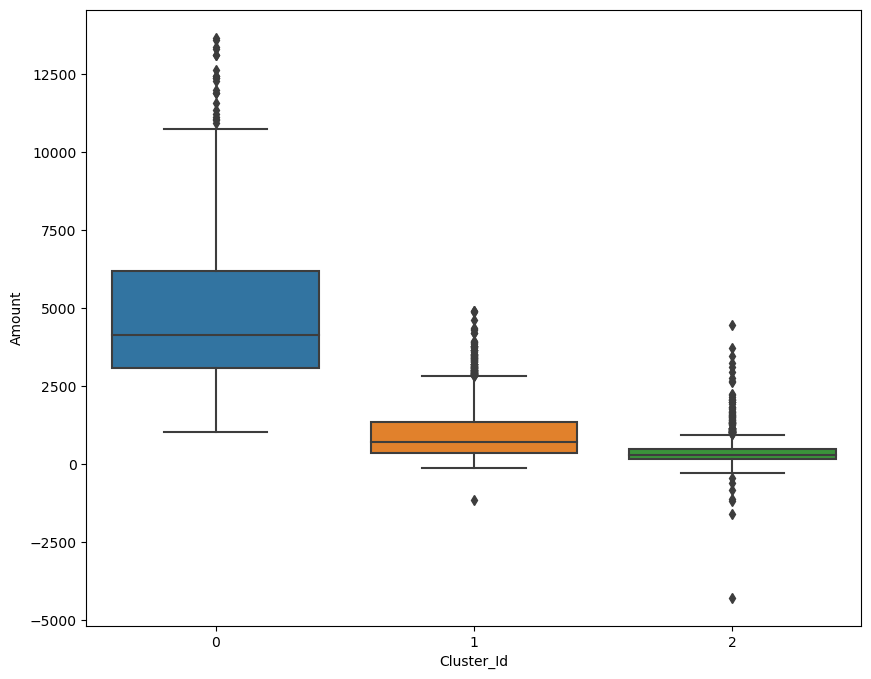

In [34]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

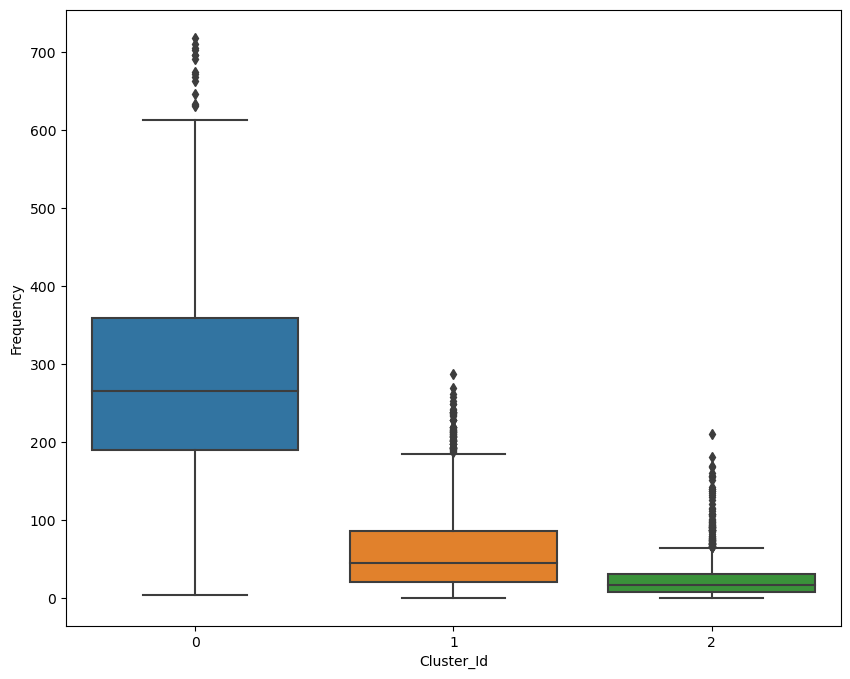

In [35]:

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

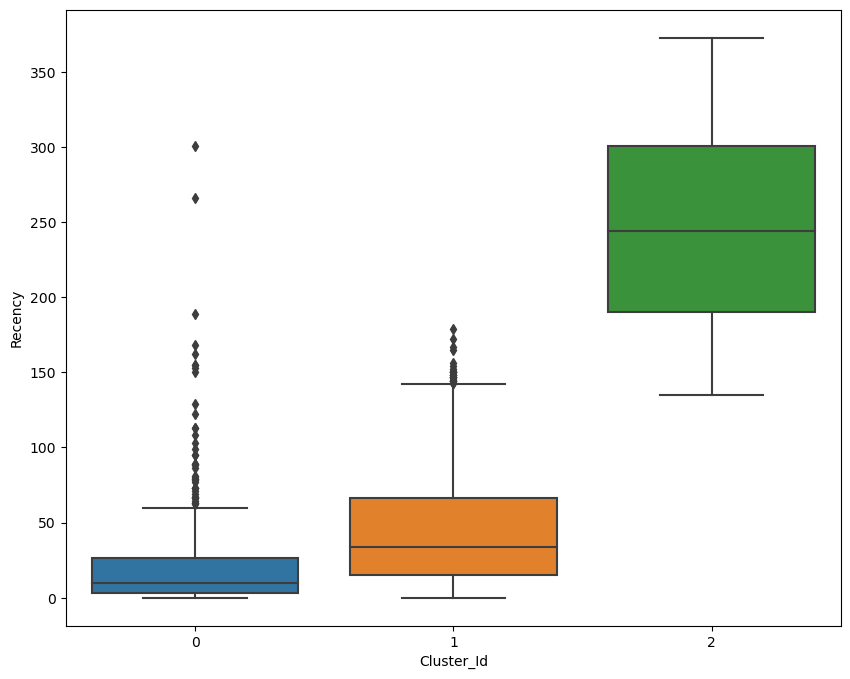

In [36]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

# 7. Results (K-means Clustering)

**Analysis of Results (K-Means clustering):**

1. Customer with Cluster_id 1 has contributed the highest amount and least is the 
   customers with Cluster_id 2.
2. The most frequent buyers are clients with Cluster-id 1.
3. Customers are not recent buyers of Cluster-id 2.


# 8. Hierarchical Clustering

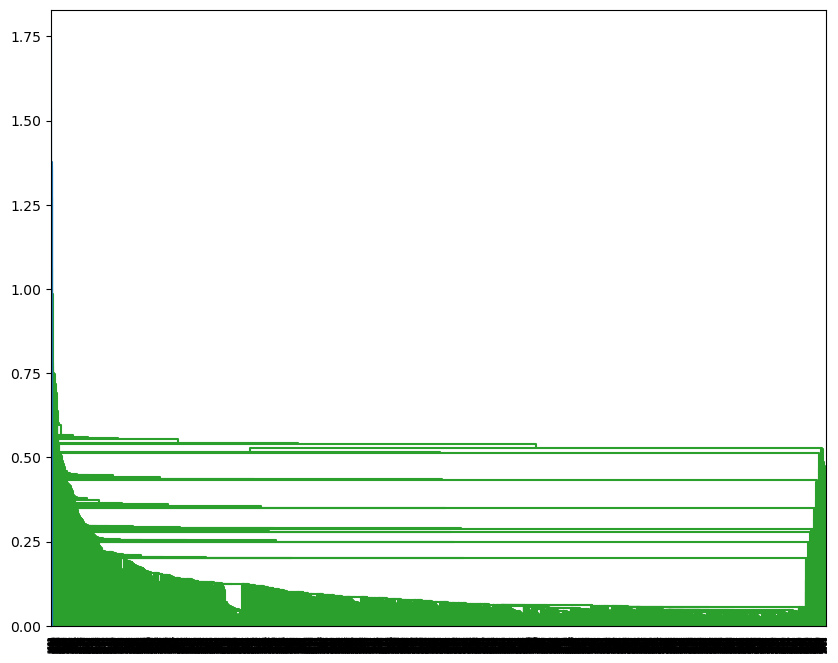

In [37]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

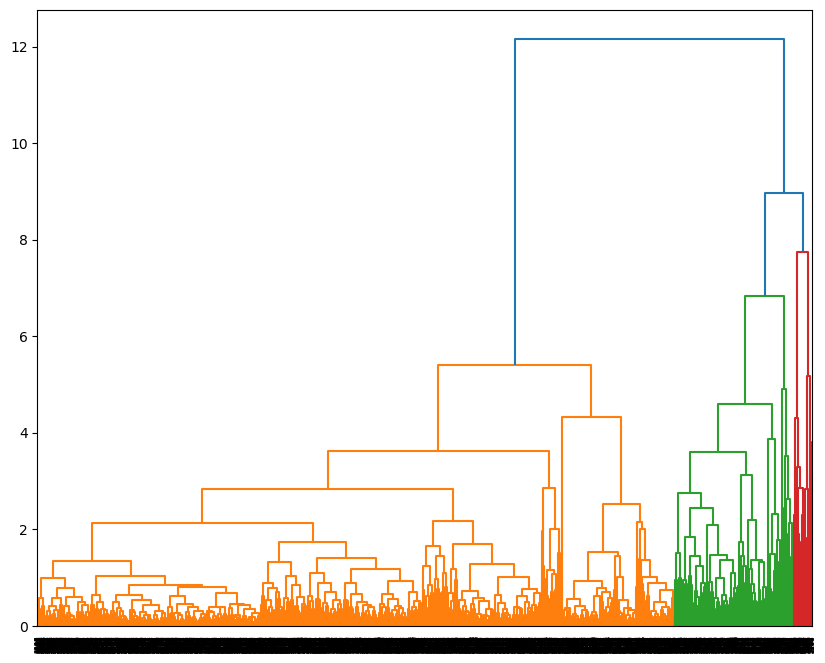

In [38]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

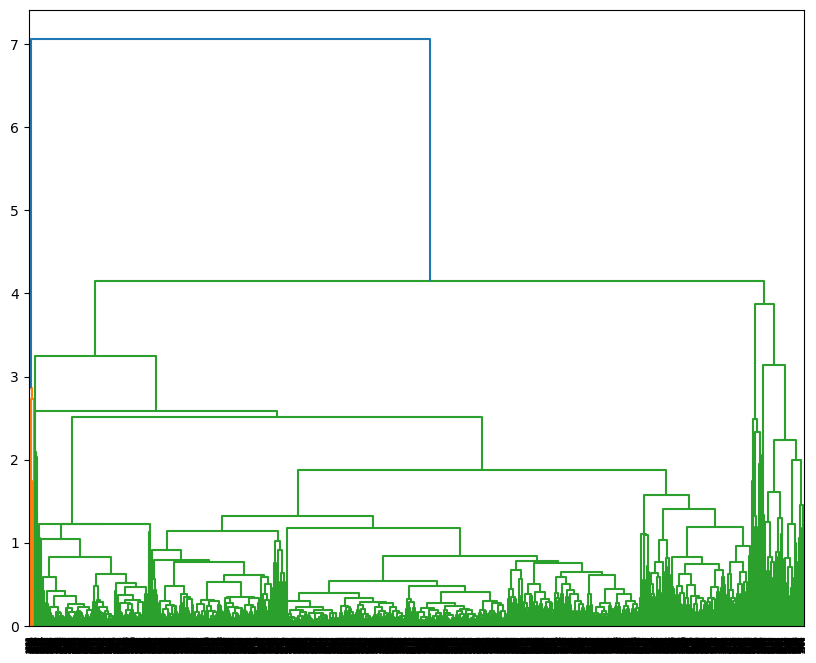

In [39]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [40]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

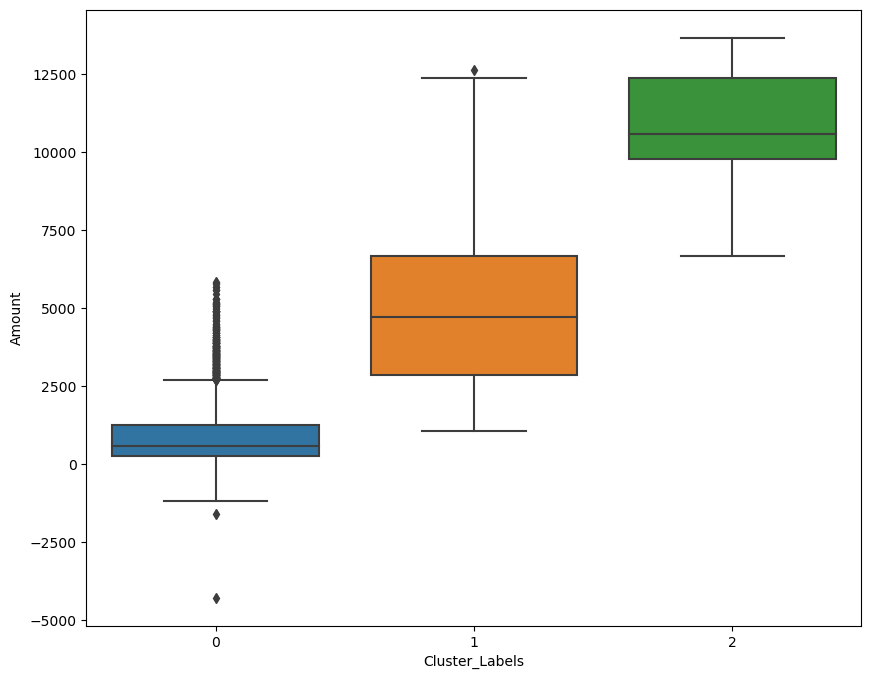

In [42]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

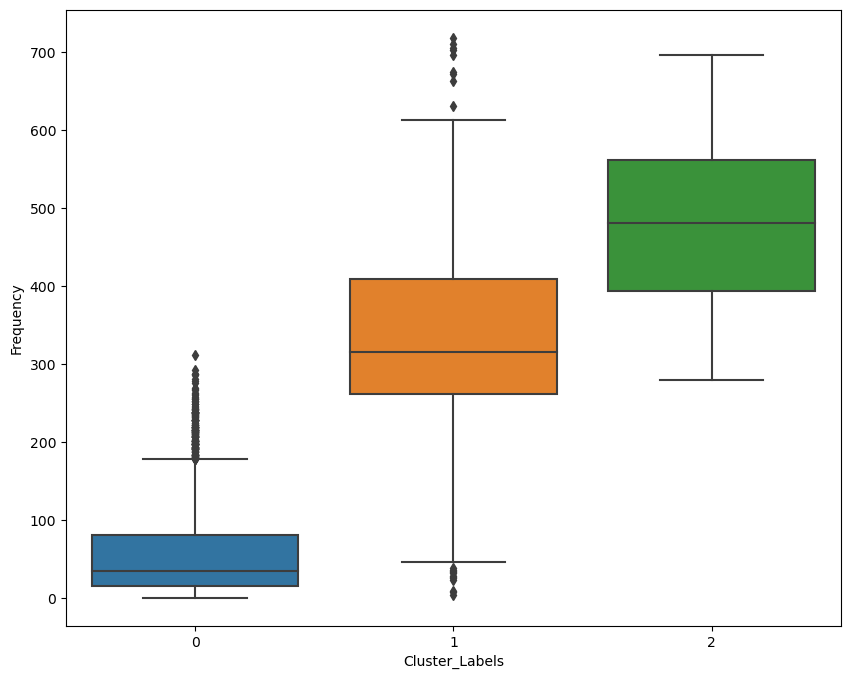

In [43]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

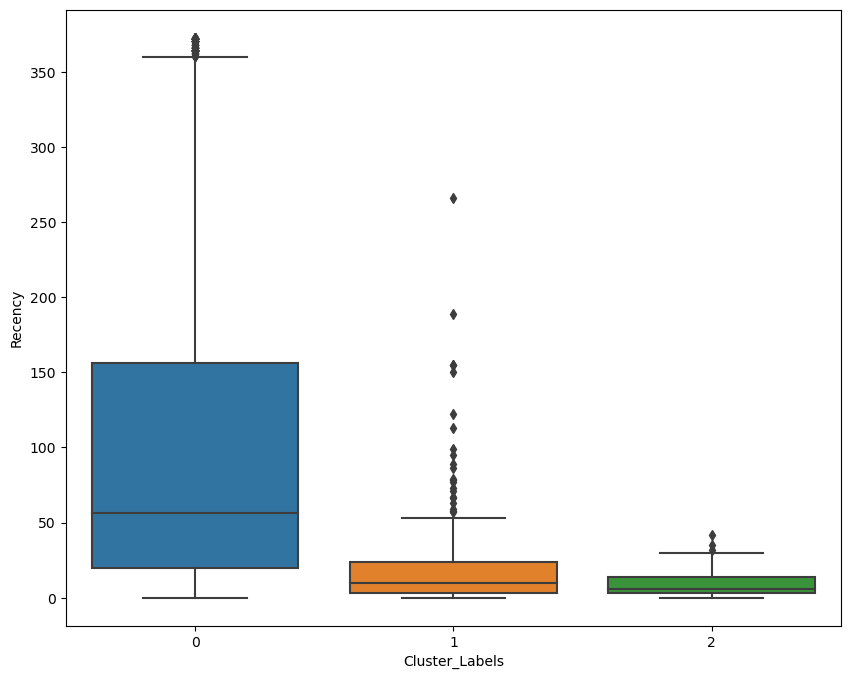

In [44]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

# 9. Results (Hierarchical Clustering)

Analysis of Results (Hierarchical Clustering):
 
1. Customers with cluster_labels 1 are contributed highest amount where as the least 
   are with cluster_labels 0.
2. Customers with cluster_label 2 are not recent buyers.
3. Customer with cluster_labels 2 are frequent buyers and followed by customers with 
   cluster_lables 1.